<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/Playstore-analysis-capstone-project-1/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## <b> Let us start by importing some of the required libraries with which we will be working on. </b>

In [351]:
# codes to import Pandas,Numpy,Matplotlib,Warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [352]:
# lets read our csv file
df1 = pd.read_csv('/content/Copy of Play Store Data.csv')

In [353]:
#lets check whats inside our data, we will just need top 10 rows 
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [354]:
# lets also check what rows are at bottom
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [355]:
#lets check the columns present in our data
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [356]:
#checking info of our data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##<B> We first try to clear our DataFrame with all unnecessary values and null values 


## <B> We can use the isnull() function To know if there is any missing value or Nan value in the dataset,

In [357]:
#checking null values
df1.isnull().sum()          

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We saw that the dataset contains many Null or missing values respectively. we will try to get rid of all null values 1 by 1

In [358]:
# lets start with the column Type
df1[df1.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [359]:
#Dropping row
df1 = df1.drop(9148)           

In [360]:
#checking again
df1[df1.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [361]:
# Checking again it its get replaced or not
df1.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#Now, we can move on to the column Content Rating :

In [362]:
#Checking null
df1[df1['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [363]:
#Dropping null
df1 = df1.drop(10472)

In [364]:
#Checking head
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##  Rating column contains a total of 1474 of missing values

In [365]:
df1['Rating'].value_counts()       #checking counts of each rating

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [366]:
#Replacing null values 
df1['Rating']=df1['Rating'].replace(np.nan,0)

In [367]:
#Replacing NAN from current ver and android ver
df1['Current Ver']=df1['Current Ver'].replace(np.nan,0)
df1['Android Ver']=df1['Android Ver'].replace(np.nan,0)

Finally, after fixing all the missing values, we should have a look at our dataframe

In [368]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.

##Now we are done with the data cleansing part and in a state to start the work for data preparation

In [369]:
#Descriptive  summary
df1.describe()

,Rating
count,10839.000000
mean,3.622105
std,1.514233
min,0.000000
25%,3.700000
50%,4.200000
75%,4.500000
max,5.000000


## Here in our Descripted summary we saw we only have ratings which is not right ,our (Review ,Installs,Price,size) columns should also be included here as well ,so 

*  First we will check what is the Dtype of columns
*  Second we need it to change it to Float type or int type 



In [370]:
#lets see what information we have for our data using
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10839 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


##<B> Changing Dtype of Reviews to Float Dtype




In [371]:
# changing to float
df1['Reviews']=df1['Reviews'].astype(float)

In [372]:
df1['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10839, dtype: float64

##<B>Changing Dtype of Size to Float Dtype

In [373]:
#Finding unique values in column size
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [374]:
# Using lambda function
df1['Size'] = df1.Size.apply(lambda x: x.replace('M','e+6').replace('k','e+3'))

In [375]:
df1['Size']

0                     19e+6
1                     14e+6
2                    8.7e+6
3                     25e+6
4                    2.8e+6
                ...        
10836                 53e+6
10837                3.6e+6
10838                9.5e+6
10839    Varies with device
10840                 19e+6
Name: Size, Length: 10839, dtype: object

In [376]:
#Checking if the string present 
df1['Size']== 'Varies with device'

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839     True
10840    False
Name: Size, Length: 10839, dtype: bool

In [377]:
#Replacing the string
df1['Size']=df1['Size'].replace('Varies with device',np.nan)

In [378]:
#Replacing the nan
df1['Size']=df1['Size'].replace(np.nan,0)

In [379]:
#Changing to Float type
df1['Size']=df1['Size'].astype(float)

In [380]:
#Checking again Unique values
df1['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07, 0.00e+00,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

Time to check info it its changed or not

In [381]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10839 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


##<B> Changing Dtype of Install to int Type

In [382]:
#Lets check what unique value installs columns holds
df1['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

 Installs Column:
To convert this column from object to integer type. First of all, we will need to remove the + and ','symbol from these values.

##The Strip() method in Python removes or truncates the given characters from the beginning and the end of the original string. The default behavior of the strip() method is to remove the whitespace from the beginning and at the end of the string

###LETS apply strip method to values inside our Installs columns

In [383]:
#Applying Strip method
df1['Installs'] = df1.Installs.apply(lambda x: x.strip('+'))

In [384]:
df1['Installs'] = df1.Installs.apply(lambda x: x.replace(',', ''))

In [385]:
df1['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10839, dtype: object

Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.

In [386]:
#converting to int
df1['Installs'] = df1['Installs'].astype(int)

In [387]:
#checking info again
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10839 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


#lets check our price column


In [388]:
#Checking Values
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [389]:
df1['Price'] = df1['Price'].astype(float)

ValueError: ignored

here we face problem as there is a string $ attached to our prices , we need to remove it


In [390]:
# using Strip function
df1['Price'] = df1.Price.apply(lambda x: x.strip('$'))

In [391]:
#checking if its removed or not
df1['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [392]:
#Converting to Numeric type
df1['Price'] = df1['Price'].astype(float)

##<B>All issues have been fixed, lets have a final look at the data frame.

In [393]:
#Checking info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10839 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


In [394]:
# Checking top rows
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [395]:
#Descriptive summary
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,1.083900e+04,1.083900e+04,10839.000000
mean,3.622105,4.441939e+05,1.815377e+07,1.546577e+07,1.027463
std,1.514233,2.927893e+06,2.217094e+07,8.503315e+07,15.950436
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,2.600000e+06,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


###finally we have all desired columns of type int and Float in our descriptive summary

##-<b>Exploratory Analysis and Visualization


Let’s begin by importing matplotlib.pyplot and seaborn , and at the same time set our fig size, font size, etc.


In [397]:
#Importing the libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')


##<B> Top categories on Google Playstore

In [398]:
df1['Category'].value_counts()

FAMILY                 1971
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

Text(0.5, 1.0, 'Top apps on playstore')

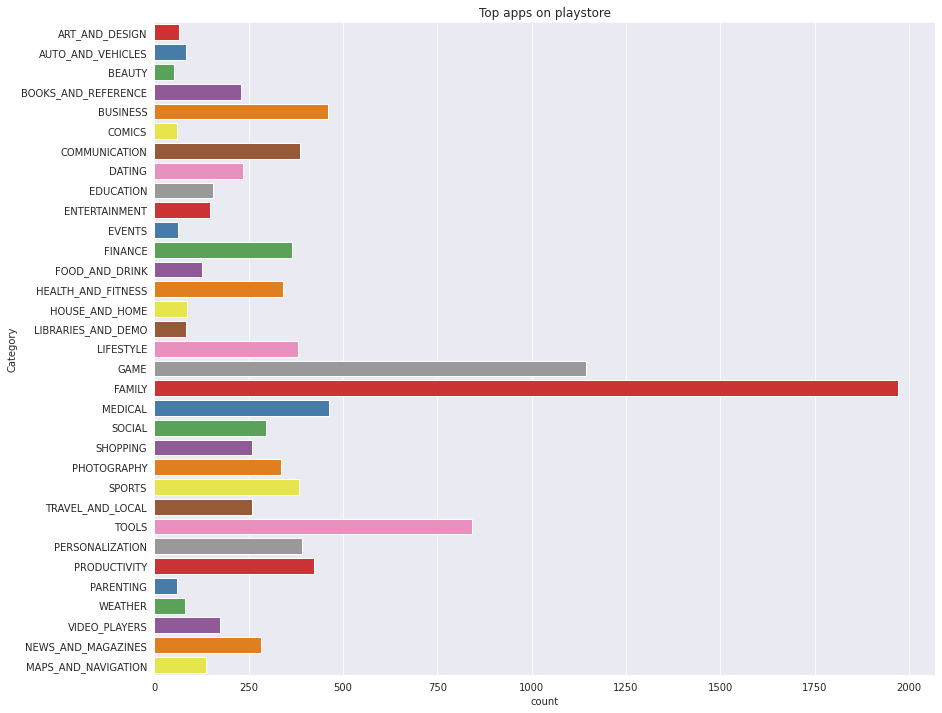

In [399]:
#Plottting countplot
plt.figure(figsize=(14,12))
plt.xlabel("Count")
plt.ylabel("Category")
sns.countplot(y='Category' ,data = df1, palette= 'Set1')
plt.title('Top apps on playstore')

#From the above chart we can see that Family and Game categories have highest count which means most games on Playstore  belong to them,and we can also see Comics and Beauty have the least count.

##<B>Which category App’s have the most number of installs?
To answer this question we need to create a separate data frame out of our googlestore_df data frame which will contain a grouped value by Category and Installs .

In [400]:
#Creating new DataFrame using GroupBy and printing
installs_df = df1.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
printing(installs_df)

NameError: ignored

Text(0.5, 1.0, 'Top installs on playstore')

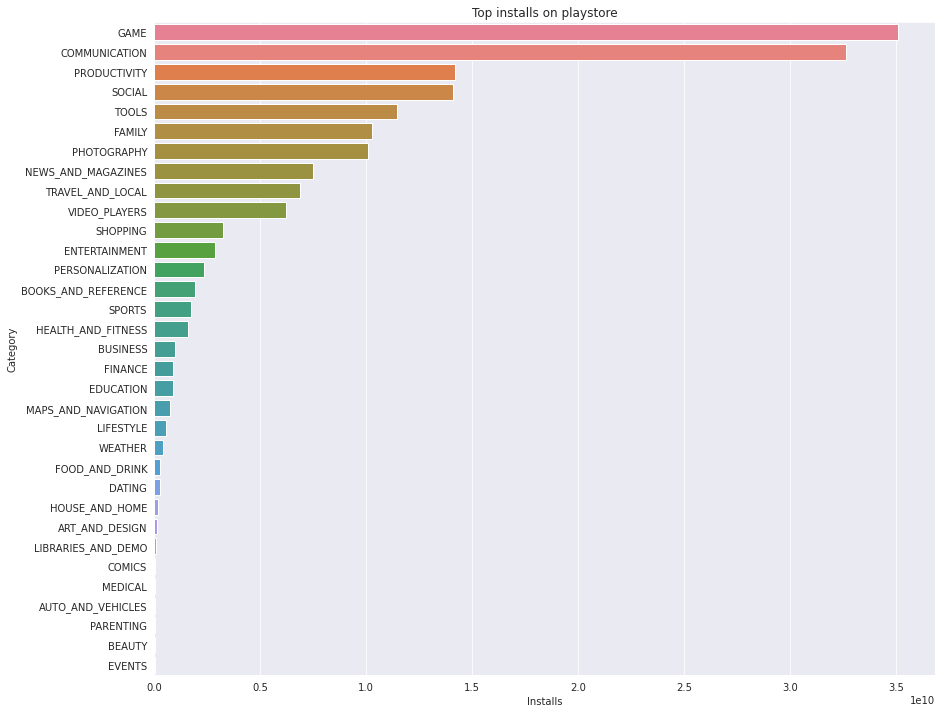

In [401]:
#Plotting a barplot
plt.figure(figsize=(14,12))
plt.xlabel("Installs")
plt.ylabel("Category")
sns.barplot(y=installs_df.index ,x= 'Installs' ,data = installs_df, palette= 'husl')
plt.title('Top installs on playstore')

##From the above Barplot we can see that GAME ,COMMUNICATION, PRODUCTIVITY SOCIAL, TOOLS , are popular ones among people

##<B>Now lets try to find out which game category got many reviews from public

##we will try to show this by using Scatter plot 
* first we create a new DataFrame with category and reviews 



In [402]:
#creating a dataframe
relation_df = df1.groupby('Category')[['Reviews']].sum().sort_values(by='Reviews', ascending=False)
relation_df

,Reviews
Category,
GAME,1.585422e+09
COMMUNICATION,8.154623e+08
SOCIAL,6.212414e+08
FAMILY,4.102263e+08
TOOLS,2.731850e+08
PHOTOGRAPHY,2.135166e+08
SHOPPING,1.150412e+08
PRODUCTIVITY,1.141170e+08
VIDEO_PLAYERS,1.103802e+08


Text(0.5, 1.0, 'Top App in Reviews on playstore')

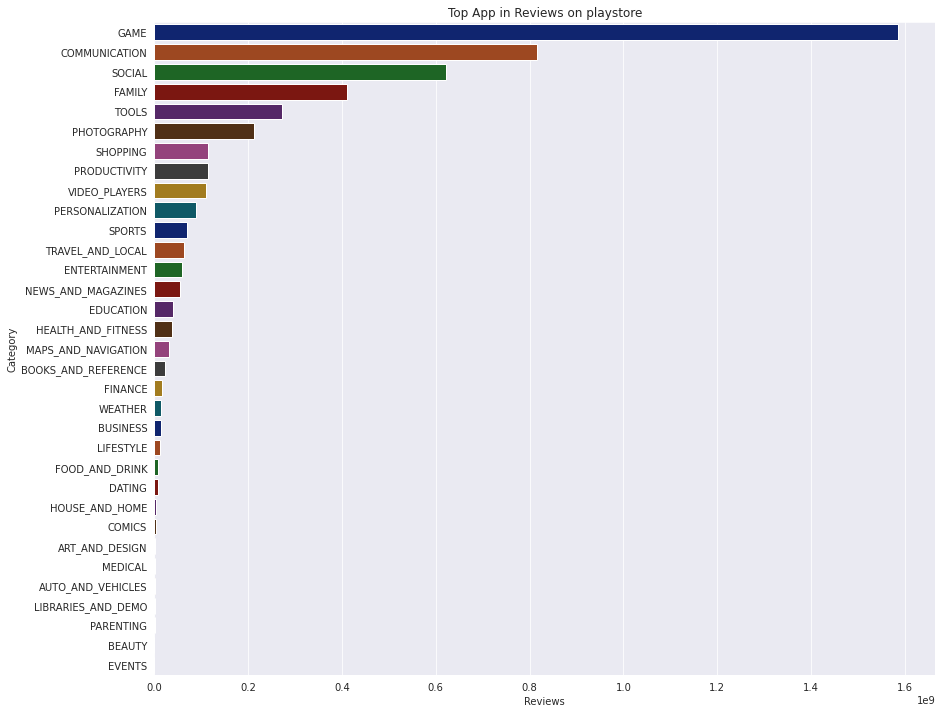

In [403]:
plt.figure(figsize=(14,12))
plt.xlabel("Reviews")
plt.ylabel("Category")
sns.barplot(y=relation_df.index ,x= 'Reviews' ,data = relation_df , palette= 'dark')
plt.title('Top App in Reviews on playstore')

###Here we can also see that Games apps have lot of reviews comapred to every other apps ,people like to play games more than any other app and hence its proved from both our bar plots,Communication apps are second in the list followed bySocial ,Family ,Tools , Photography and other...

##<B> Types of Content Rating available on Playstore and their count

##<B>Let’s plot a Pie Chart to view our data

In [404]:
#Value counts in content rating column
df1['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

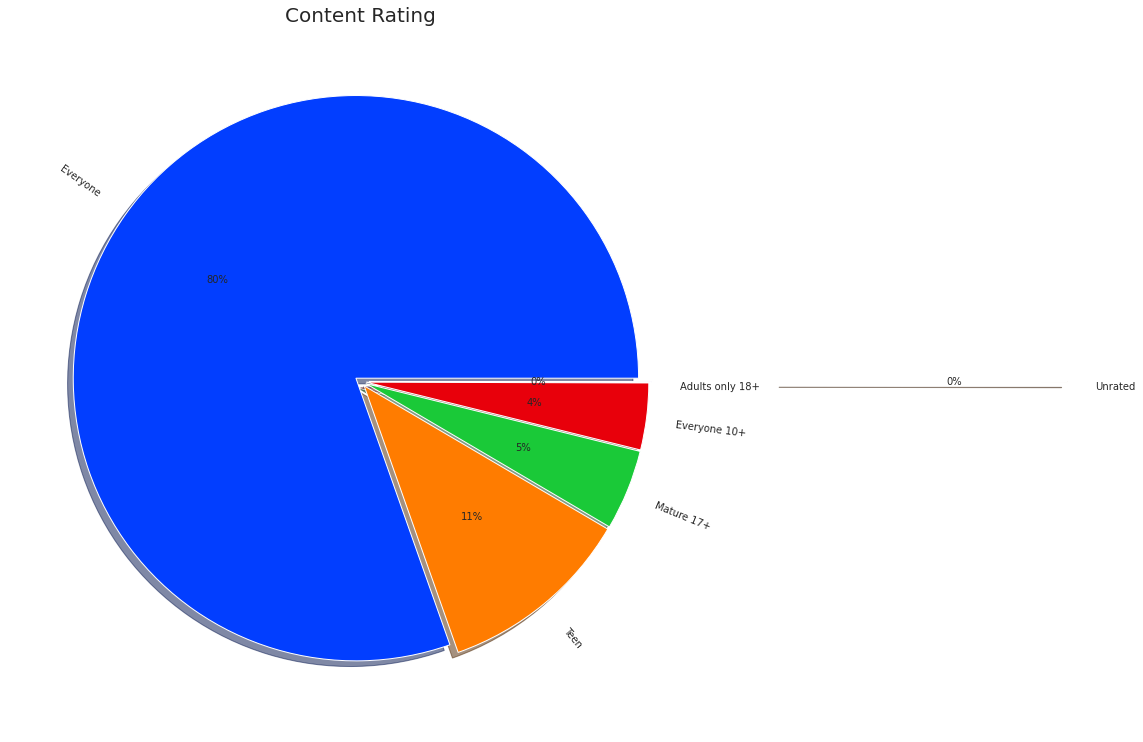

In [405]:
plt.figure(figsize=(14,13))                                        #setting fig size
plt.title('Content Rating',size = 20)                              # giving title name
explode = [0.02,0.02,0.02,0.02,0.03,1.5]                             
colors = sns.color_palette('bright')                               # Seaborn color palette to plot pie chart
plt.pie(df1['Content Rating'].value_counts(), labels=df1['Content Rating'].value_counts().index, colors=colors,autopct='%.0f%%',explode = explode,shadow=True, rotatelabels='true')     
plt.show()

##From the above we can see Everyone category hold maximum percentage (81%) of this pie chart, 11% is for teens ,5% for  Mature 17+ ,4% belong to Everyone 10+ 
##and almost negligible 0% holds for Adult 18+ and Underrated

##<B>Let’s have a look at the distribution of the ratings in the data frame.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


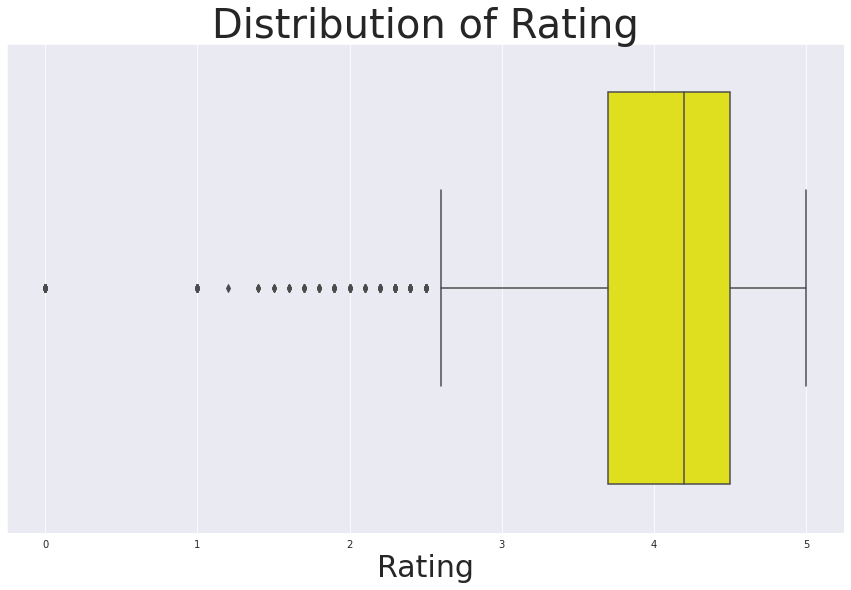

In [406]:
#Plotting A Graph
plt.figure(figsize=(15,9))
plt.xlabel('Rating',size = 30)
graph = sns.boxplot(df1.Rating, color="yellow")
plt.title('Distribution of Rating',size = 40);

In [407]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,1.083900e+04,1.083900e+04,10839.000000
mean,3.622105,4.441939e+05,1.815377e+07,1.546577e+07,1.027463
std,1.514233,2.927893e+06,2.217094e+07,8.503315e+07,15.950436
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,2.600000e+06,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


#We see in this Box plot that max number of ratings lie between 3.7-4.5 which can be easily compared with our descriptive summary of our dataframe, its exact match

##<B>Top Apps categories in free vs paid apps

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'Top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


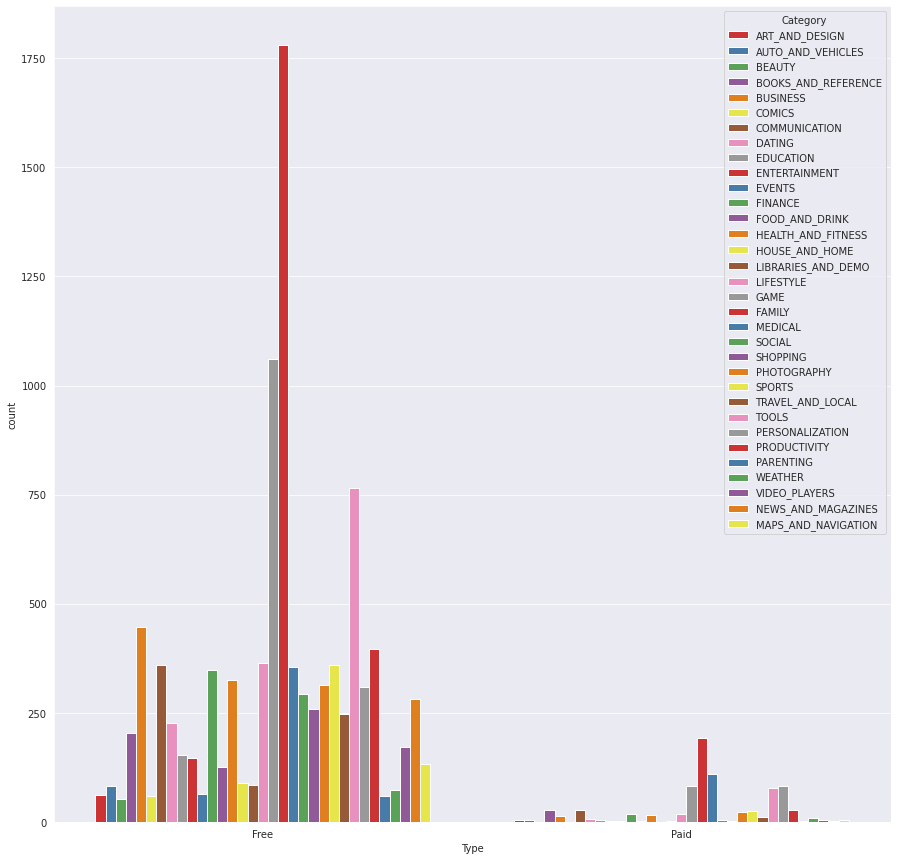

In [408]:
#plotting a count graph
plt.figure(figsize= (15,15))
plt.legend(df1.Category, loc="Top right", title="Category",fontsize = "xx-small");
sns.countplot(x='Type',hue = 'Category' ,data = df1, palette= 'Set1')


## From the chart above we can clearly see that in both free and paid version of app Family category has high number of counts,Game category is at 2nd position and Tools category at 3rd position in free versions whereas in paid version Medical category is at 2nd position and Game category at 3rd

#<B>Lets try to find out installs of apps in both free and paid versions

Text(0.5, 1.0, ' Installs of apps in both free and paid versions')

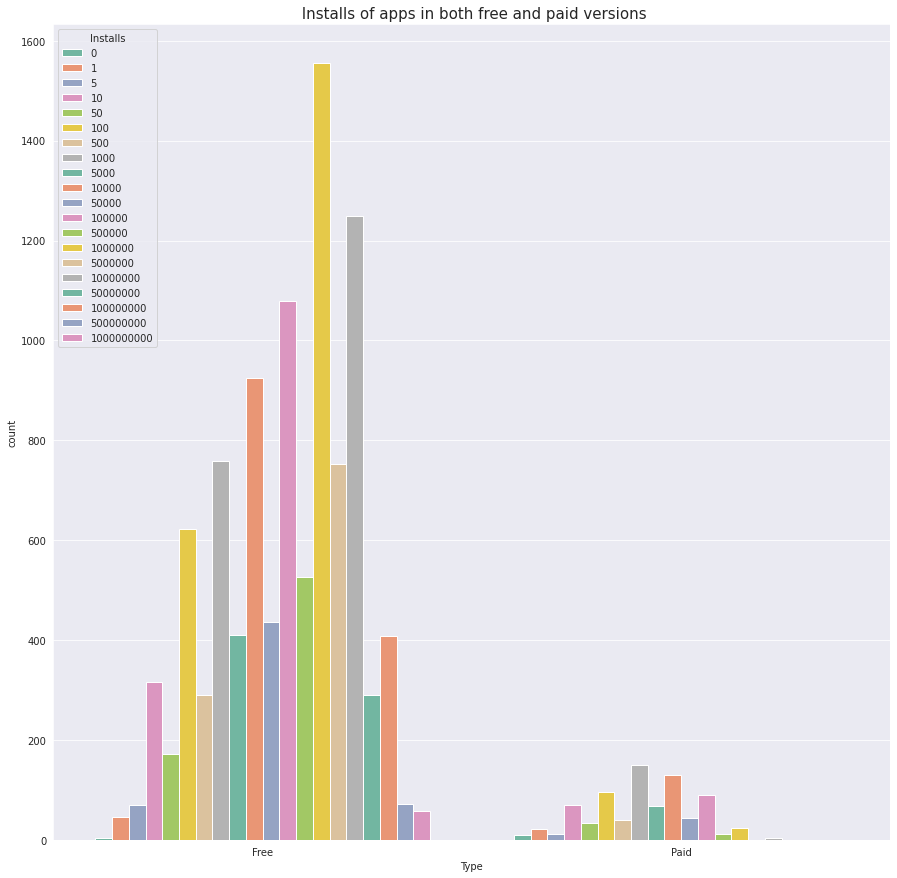

In [409]:
plt.figure(figsize= (15,15))
sns.countplot(x='Type',hue = 'Installs' ,data = df1, palette= 'Set2')
plt.title(' Installs of apps in both free and paid versions',size= 15)

#From the above graph it pretty clear that people like to install apps which are free of cost, paid apps are only for those who like to spend money in games,also lots of choices are available with free apps ,thats one reason we can add to this case

#<B>The Apps with highest number of reviews

In [410]:
#Sorting Dataframe on basis of reviews
rev_app = df1.sort_values(by='Reviews', ascending=False).head(20)
rev_app.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


#Note: From the above dataframe we can interprete, and come to conculsion that the Apps Facebook,WhatsApp Messenger,Instagram,Messenger – Text and Video Chat for Free,Clash of Clans	 has the highest number of reviews on google playstore.

#<B>**CORRELATION**

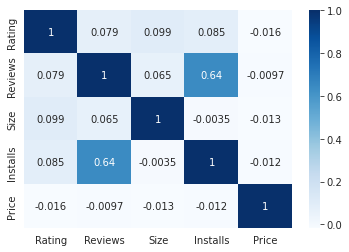

In [411]:
#Drawing correlations through Heatmap
sns.heatmap(df1.corr(),cmap= 'Blues',annot= True)

#From the above heatmap we can easily say that price has Negative correlations with Ratings,Reviews,Size and Installs,it means price wont affect any of them, Whereas Installs have Positive Correaltions (0.63) reivews do affect the number of Installs 